In [1]:
from transformers import ViTModel
import cv2
import matplotlib.pyplot as plt

In [2]:
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
vit_model 

ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0): ViTLayer(
        (attention): ViTAttention(
          (attention): ViTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation()
      

In [3]:
# featureExtractor: how we convert images to a tensor
# similar to tokenizer in NLP
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
feature_extractor

/opt/conda/lib/python3.8/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

(334, 500, 3)


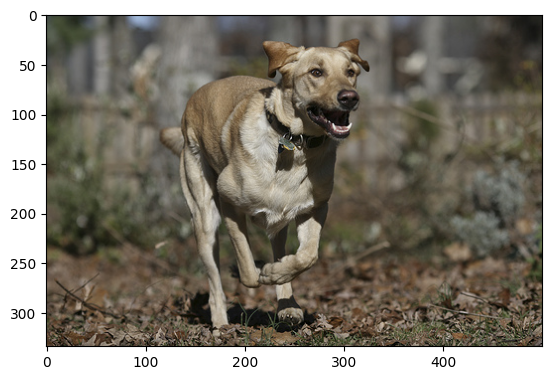

In [7]:
img = cv2.cvtColor(cv2.imread('data/flicker_images/images/3148647065_2d6cd88cf6.jpg'), cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

In [6]:
feature_extractor(img).pixel_values[0].shape, feature_extractor(img)

((3, 224, 224),
 {'pixel_values': [array([[[-0.4588235 , -0.44313723, -0.45098037, ..., -0.70980394,
          -0.70980394, -0.7254902 ],
         [-0.44313723, -0.45098037, -0.47450978, ..., -0.7176471 ,
          -0.7176471 , -0.7254902 ],
         [-0.46666664, -0.47450978, -0.4823529 , ..., -0.7176471 ,
          -0.7176471 , -0.70980394],
         ...,
         [-0.3960784 , -0.38823527, -0.41176468, ..., -0.30196077,
          -0.1607843 , -0.12941176],
         [-0.34117645, -0.38039213, -0.40392154, ..., -0.2235294 ,
          -0.21568626, -0.45098037],
         [-0.20784312, -0.29411763, -0.3490196 , ..., -0.26274508,
          -0.38823527, -0.23921567]],
 
        [[-0.3960784 , -0.372549  , -0.372549  , ..., -0.70980394,
          -0.70980394, -0.7254902 ],
         [-0.372549  , -0.372549  , -0.3960784 , ..., -0.7176471 ,
          -0.70980394, -0.7176471 ],
         [-0.3960784 , -0.3960784 , -0.40392154, ..., -0.70980394,
          -0.70980394, -0.7019608 ],
         ...,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


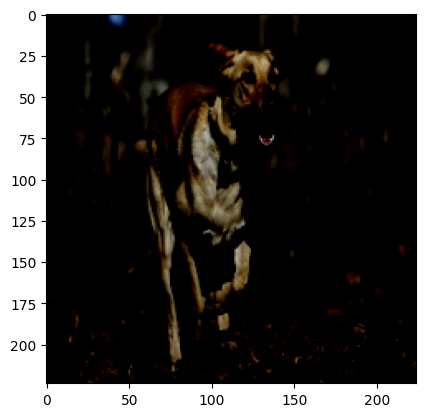

In [8]:
plt.imshow(feature_extractor(img).pixel_values[0].transpose(1, 2, 0))